In [1]:
## Gather the indovidual evaluation json files and present the data
import os, json
from pathlib import Path
import pandas as pd
JSON_ROOT = Path("results/individual_train")

In [130]:
EXP_ID = "01261211"
single_langs, zero_shots = [], []
for p in JSON_ROOT.iterdir():
    if EXP_ID in str(p):
        single_langs.append(p)
    elif "json" in p.suffix: 
        zero_shots.append(p)
epoch_logs = [] # Join the train and eval log
for p in single_langs:
    language = p.stem.split("_")[-1]
    with open (p )as rf:
        logs = json.load(rf)

    for l in logs:
        if "eval_f1" in l:
            l["eval-language"] = language
            l["train-language"] = language
            epoch_logs.append(l)



    # for i in range(1, len(logs),2):
    #     print(i, end= ", ")
    #     train = logs[i-1]
    #     eval = logs[i]
    #     assert train["epoch"] == eval["epoch"]
    #     epoch_logs.append({**{"language":language}, **train, **eval})

singles_df = pd.DataFrame.from_records(epoch_logs)

# singles_df[singles_df["language"]=="pt"]
# singles_df.to_csv(Path(JSON_ROOT,  "individual_models.csv"), sep="\t", decimal=",")

In [131]:
# ## Get the individual tests on model trained on multilingual
# source_path = Path("results/tr-multi_test_individual.json")
# with open(source_path) as rf:
#     mul_ind = json.load(rf)
# results = []
# for dict in mul_ind:
#     lang = next(iter(dict))
#     dict[lang]["eval-language"]= lang
#     dict[lang]["train-language"]= "multilingual"
#     results.append(dict[lang])
        
#     #     res["language"] = language
#     #     results.append(res)
# multi_single = pd.DataFrame.from_records(results)
# multi_single.to_csv(Path(JSON_ROOT,  "individual_tests_multi.csv"), sep="\t", decimal=",")


# # Get the zero-shot results
# results = []
# for p in zero_shots:
#     with open (p )as rf:
#         logs = json.load(rf)
#     logs["eval-language"] = p.stem.split("_")[-1]
#     logs["train-language"] = p.stem.split("_")[-3]
#     results.append(logs)
# z_shots = pd.DataFrame.from_records(results)

# df_allsofar = pd.concat([multi_single, singles_df, z_shots], axis=0)


In [164]:
# ## Get the results from the language groups
# # This one only reports evaluation on the group, whitch is not so valuable
# LOG_ROOT = Path("logs")
# EXP_ID = "01281849"
# lang_groups = [] # Language groups trainer log
# epoch_logs = [] # Join the train and eval log
# for p in LOG_ROOT.iterdir():
#     if str(p).startswith(f"{LOG_ROOT}/trainer_log_{EXP_ID}"):
#         lang_groups.append(p)
# for p in lang_groups:
#     language = p.stem.split("_")[-1]
#     with open (p )as rf:
#         logs = json.load(rf)

#     for l in logs:
#         if "eval_f1" in l:
#             l["eval-language"] = language
#             l["train-language"] = language
#             epoch_logs.append(l)
# groups_df = pd.DataFrame.from_records(epoch_logs)


# # get the individual language results predicted with the language group model

# with Path("logs/01281849.log").open() as rf:
#     log = rf.readlines()
# results = []
# for line in log:
#     line_head = line.split(":")[0]
#     line_body = ":".join(line.split(":")[1:])

#     if not " " in line_head:
#         head_info = line_head.split("_")
#         try:
#             data = json.loads(line_body.replace("'", '"'))
#             data["train-language"] = head_info[1]
#             data["eval-language"] = head_info[-1]
#             results.append(data)


#         except:
#             print("Failed to read line:", line_body)

# groups_single = pd.DataFrame.from_records(results)

# #We have now the results of sungles_df, multi_single and group_single.
# #The singles_df have all epochs, so need to find the best.

# results = []
# top_k = 1
# for e_lang, group in singles_df.groupby("eval-language"):
#     top_n = group.sort_values("eval_f1", ascending=False).head(top_k)
#     results.append(top_n)
# top_per_language = pd.concat(results)
# save_file = f"results/all-ind_top{top_k}.csv"
# top_per_language.to_csv(Path(  save_file), sep="\t", decimal=".")
# multi_single.head(20)

# all_three = pd.concat([multi_single, groups_single, top_per_language])[[c for c in top_n.columns if not ("second" in c or "runtime" in c or "step" in c)]]

# # all_three[["eval-language", "train-language","eval_f1"]].sort_values(["eval-language", "eval_f1"], ascending=False).to_csv("results/ind-multi-group_dev.csv", sep="\t", decimal=".")
# all_three[["eval-language", "train-language","eval_f1"]].sort_values(["eval-language", "eval_f1"], ascending=False).head(9)

,eval-language,train-language,eval_f1
45,yo,yo,0.715479
9,yo,multilingual,0.699673
3,yo,Volta-Congo,0.328843
74,twi,twi,0.609570
11,twi,multilingual,0.522877
1,twi,Volta-Congo,0.332232
28,ts,ts,0.512260
6,ts,multilingual,0.506516
0,ts,Volta-Congo,0.306168


## Import and convert data for the paper.


In [133]:
langs_df = pd.read_csv("datasets/lang_train.csv").set_index("2-letter")
short_to_long = {short: data["Language"] for short, data in langs_df.to_dict("index").items()}

df = pd.read_csv("results/pred_200/model_evals2.csv", sep=";", decimal=",")
results = df[[c for c in df.columns if "Model" not in c]].mul(100).round(1).astype(str).add('\%').rename(short_to_long, axis=1)
models = df.Model.replace("tweet-afri/", "", regex=True)
save_df = pd.concat([models, results], axis=1).set_index("Model").T
# save_df.style.to_latex("results/pred_200/model_evals.txt")
save_df


Model,afro-xlmr-mini,mpnet-base-v2,xlmt,xlmt_sent
Amharic,58.5\%,45.0\%,58.5\%,63.5\%
AlgerianArabic,64.0\%,57.5\%,66.5\%,68.0\%
Hausa,74.5\%,71.5\%,75.0\%,71.5\%
Igbo,74.0\%,72.5\%,74.5\%,75.0\%
Kinyarwanda,60.0\%,59.0\%,63.5\%,63.0\%
"MoroccanArabic/Darija,",75.5\%,70.0\%,81.5\%,78.0\%
Nigerian_Pidgin,72.0\%,78.0\%,77.0\%,74.0\%
MozambicanPortuguese,62.0\%,59.5\%,72.0\%,70.0\%
Swahili,57.0\%,57.5\%,58.5\%,58.5\%
Xitsonga,49.5\%,47.5\%,55.0\%,58.5\%


In [134]:
df

,Model,am,dz,ha,ig,kr,ma,pcm,pt,sw,ts,twi,yo
0,tweet-afri/afro-xlmr-mini,0.585,0.640,0.745,0.740,0.600,0.755,0.72,0.620,0.570,0.495,0.620,0.735
1,tweet-afri/mpnet-base-v2,0.450,0.575,0.715,0.725,0.590,0.700,0.78,0.595,0.575,0.475,0.650,0.740
2,tweet-afri/xlmt,0.585,0.665,0.750,0.745,0.635,0.815,0.77,0.720,0.585,0.550,0.655,0.790
3,tweet-afri/xlmt_sent,0.635,0.680,0.715,0.750,0.630,0.780,0.74,0.700,0.585,0.585,0.680,0.755


In [151]:
# # Report best epoch for both ind, group and multi for all languages
# mapping = {short:short_to_long.get(short, short) for short in all_three["train-language"].unique()}
# save_df = all_three[["eval-language", "train-language","eval_f1"]].sort_values(["eval-language", "eval_f1"], ascending=True)
# save_df["train-language"] = save_df["train-language"].map(mapping)
# save_df["eval-language"] = save_df["eval-language"].map(mapping)
# save_df["eval_f1"] = save_df["eval_f1"].mul(100).round(1).astype(str).add('%')

# save_df.dropna().to_latex("results/ind_group_multi.txt", index=False) # Zero-shot languages get NaN for eval-language. DId not see how to drop index with style.to_latex

/tmp/ipykernel_5808/24553869.py:8: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  save_df.dropna().to_latex("results/ind_group_multi.txt", index=False) # Zero-shot languages get NaN for eval-language. DId not see how to drop index with style.to_latex


In [49]:
# 21. februar: Ny innlesing av nye data.
import os, json
from pathlib import Path
import pandas as pd
# Tre (fire) filer som skal ha all informasjonen
read_paths = [p for p in Path("results").iterdir() if p.stem.startswith("022")]
print("lest inn", [str(p) for p in read_paths])
dfs = []
for read_path in read_paths:
    # json_data = json.loads(read_path.read_text())
    dfs.append(pd.read_json(read_path))
results = pd.concat(dfs)
sort_order = []
group_langs = json.loads(Path("datasets/group_langs.json").read_text())

sort_order += sorted([group for group in group_langs])
lang_lists = [l for  l in group_langs.values() ]
sort_order += sorted([l for lst in lang_lists for l in lst])
sort_order = ["multilingual"]+sort_order
results["test"] = results["test"].astype("category")
results["test"]=results["test"].cat.set_categories(sort_order)
# tg is zero-shot, should have been excluded?
results = results[results["test"] != "tg"]
results.sort_values(["test", "f1"])

lest inn ['results/02200814_tr-group_test_individual.json', 'results/02201448_tr-individual_test_individual.json', 'results/02211040_tr-group_test_individual.json', 'results/02201108_tr-group_test_individual.json']


,timestamp,train,test,f1
0,2211040,multilingual,multilingual,0.725535
0,2201108,multilingual,multilingual,0.728955
7,2200814,Afro-Asiatic-Semitic,Afro-Asiatic-Semitic,0.745520
12,2200814,Creole,Creole,0.748919
0,2200814,Volta-Congo,Volta-Congo,0.696994
9,2200814,Afro-Asiatic-Semitic,am,0.562112
8,2201108,multilingual,am,0.570977
8,2201448,am,am,0.599357
9,2201108,multilingual,dz,0.612450
10,2200814,Afro-Asiatic-Semitic,dz,0.664422


In [52]:
s_folder = "results/save_results-21feb"
Path(s_folder).mkdir(exist_ok=True)
save_df = results.copy().reindex()
langs_df = pd.read_csv("datasets/lang_train.csv").set_index("2-letter")
short_to_long = {short: data["Language"] for short, data in langs_df.to_dict("index").items()}
train_category = []
language_name = []
for i, row in save_df.iterrows():
    if row["train"] == row["test"]:
        train_category.append("in-language")
    elif row["train"] == "multilingual":
        train_category.append("multilingual")
    else:
         train_category.append("language-cat")
    language_name.append(short_to_long.get(row["test"], row["test"]))
save_df["train-category"] = train_category
save_df["test-language"] = language_name

save_df = save_df[["test-language","timestamp","test", "train", "train-category", "f1"]].sort_values(["test", "f1"], ascending=False)
save_df.to_json(Path(s_folder, "multi_group_single.json"), orient="records")
save_df.to_csv(Path(s_folder, "feb21results.tsv"),decimal=",", sep="\t")
# save_df.to_latex(Path(s_folder, "feb21results.txt"))
shorter_df = save_df[save_df["test"].isin(short_to_long)] 
idx = pd.MultiIndex.from_frame(shorter_df[["test-language", "train-category"]])
shorter_df = shorter_df.set_index(idx)["f1"].unstack(level=-1)
shorter_df=shorter_df.sort_values("in-language", ascending=False).mul(100).round(1).astype(str).add('%')
shorter_df["Comment"] = ""
shorter_df.to_latex(Path(s_folder, "feb21results.txt"))
shorter_df

/tmp/ipykernel_2222/2400951556.py:28: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  shorter_df.to_latex(Path(s_folder, "feb21results.txt"))


train-category,in-language,language-cat,multilingual,Comment
test-language,,,,
"MoroccanArabic/Darija,",97.5%,96.2%,96.7%,
Igbo,78.8%,77.6%,78.5%,
Hausa,77.7%,nan%,76.2%,
Yoruba,71.3%,71.4%,70.0%,
MozambicanPortuguese,71.0%,71.0%,68.8%,
AlgerianArabic,68.1%,66.4%,61.2%,
Kinyarwanda,60.9%,57.1%,55.6%,
Amharic,59.9%,56.2%,57.1%,
Twi,58.7%,56.8%,56.7%,


,train,in-language over multi
Class-short,,
Afro-Asiatic_ Chadic,14172.000000,0.400000
Afro-Asiatic_ Semitic,4406.000000,3.266667
Creole,4092.000000,1.600000
Niger-Congo_ Atlantic-Congo,4685.166667,1.866667


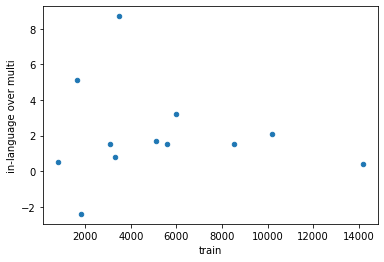

In [194]:
# Look for correlation between size of train set and performance boost with only using in-language
# Note: From old data format. Need rewriting, probably
langs_df
trainsets_pivot.index
trainset_performance = pd.concat([langs_df.set_index("Language"), trainsets_pivot], axis=1).drop("multilingual").drop("Ethnologue", axis=1)
trainset_performance ["in-language over multi"] =  ( trainset_performance["In-language"].str.replace(r'%', r'0').astype('float') - 
                                                    trainset_performance["multilingual"].str.replace(r'%', r'0').astype('float'))
trainset_performance[["train", "in-language over multi"]].plot.scatter("train",  "in-language over multi")
fams = ["_".join(c.split(",")[:2]) for c in trainset_performance["Classification"].to_list()]
creole = {'English Creole': "Creole",
 'Creole_ Portuguese based': "Creole"}
fams = [creole.get(c, c) for c in  fams]
trainset_performance["Class-short"] = fams
trainset_performance.groupby("Class-short").agg("mean")


## Konvertere fra excel-oppsummeringen til latex

In [34]:
df = pd.read_csv("results/save_results-21feb/multi-by-mono.tsv", sep="\t", decimal=",")
df[["language-cat","multilingual"]] = df[["language-cat","multilingual"]].mul(100).round(1).astype(str).add('\%')
df["F1"]= df["F1"].round(3)
df.to_latex(Path(s_folder, "pct-improvement_multilingual"))
df

/tmp/ipykernel_2222/3143025930.py:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex(Path(s_folder, "pct-improvement_multilingual"))


,Language,F1,language-cat,multilingual
0,"MoroccanArabic/Darija,",0.975,98.7\%,99.2\%
1,Igbo,0.788,98.5\%,99.6\%
2,Yoruba,0.713,100.1\%,98.2\%
3,MozambicanPortuguese,0.710,100.0\%,96.9\%
4,AlgerianArabic,0.681,97.6\%,90.0\%
5,Kinyarwanda,0.609,93.7\%,91.1\%
6,Amharic,0.599,93.8\%,95.3\%
7,Twi,0.587,96.8\%,96.6\%
8,Xitsonga,0.549,91.1\%,83.5\%
9,Nigerian_Pidgin,0.511,101.3\%,98.0\%
